# Similarity search

In [3]:
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs

In [4]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supp if m]

RDKit WARNING: [15:26:24]  S group DAT ignored on line 2516
RDKit WARNING: [15:26:24]  S group DAT ignored on line 2516
RDKit WARNING: [15:26:24]  S group DAT ignored on line 2516
RDKit WARNING: [15:26:24]  S group DAT ignored on line 2516
RDKit WARNING: [15:26:24]  S group DAT ignored on line 15552
RDKit WARNING: [15:26:24]  S group DAT ignored on line 15552
RDKit WARNING: [15:26:24]  S group DAT ignored on line 15552
RDKit WARNING: [15:26:24]  S group DAT ignored on line 15552
RDKit ERROR: [15:26:24] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:26:24] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:26:24] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:26:24] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:26:24]  S group GEN ignored on line 102860
RDKit ERROR: [15:26:24] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:26:24]  Unhand

RDKit ERROR: [15:26:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:26:25] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:26:25] ERROR: Could not sanitize molecule ending on line 519056
RDKit ERROR: [15:26:25] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:26:25] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [15:26:25] ERROR: Could not sanitize molecule ending on line 541262
RDKit ERROR: [15:26:25] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [15:26:25] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [15:26:25] ERROR: Could not sanitize molecule ending on line 557517
RDKit ERROR: [15:26:25] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [15:26:25] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit E

In [5]:
mfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [6]:
DataStructs.FingerprintSimilarity(mfp[0], mfp[666], metric=DataStructs.TanimotoSimilarity)

0.14516129032258066

In [7]:
DataStructs.FingerprintSimilarity(mfp[0], mfp[666], metric=DataStructs.DiceSimilarity)

0.2535211267605634

In [8]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")
aspirin_mfp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

In [9]:
sims = [DataStructs.FingerprintSimilarity(aspirin_mfp, fp, metric=DataStructs.TanimotoSimilarity) for fp in mfp]
sims[0:10]

[0.12389380530973451,
 0.10317460317460317,
 0.09259259259259259,
 0.10434782608695652,
 0.05555555555555555,
 0.10101010101010101,
 0.10891089108910891,
 0.11538461538461539,
 0.051470588235294115,
 0.09210526315789473]

In [10]:
hits = sorted(zip(drugbank, sims), key=lambda x: x[1], reverse=True)
hits[:10]

[(<rdkit.Chem.rdchem.Mol at 0x7f3cb14098f0>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb1411530>, 0.6129032258064516),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb087e9e0>, 0.5277777777777778),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb08ab800>, 0.52),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb1409620>, 0.4642857142857143),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb08c3260>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb08c51c0>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb08a2670>, 0.42424242424242425),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb1400e90>, 0.4166666666666667),
 (<rdkit.Chem.rdchem.Mol at 0x7f3cb08baf80>, 0.3888888888888889)]

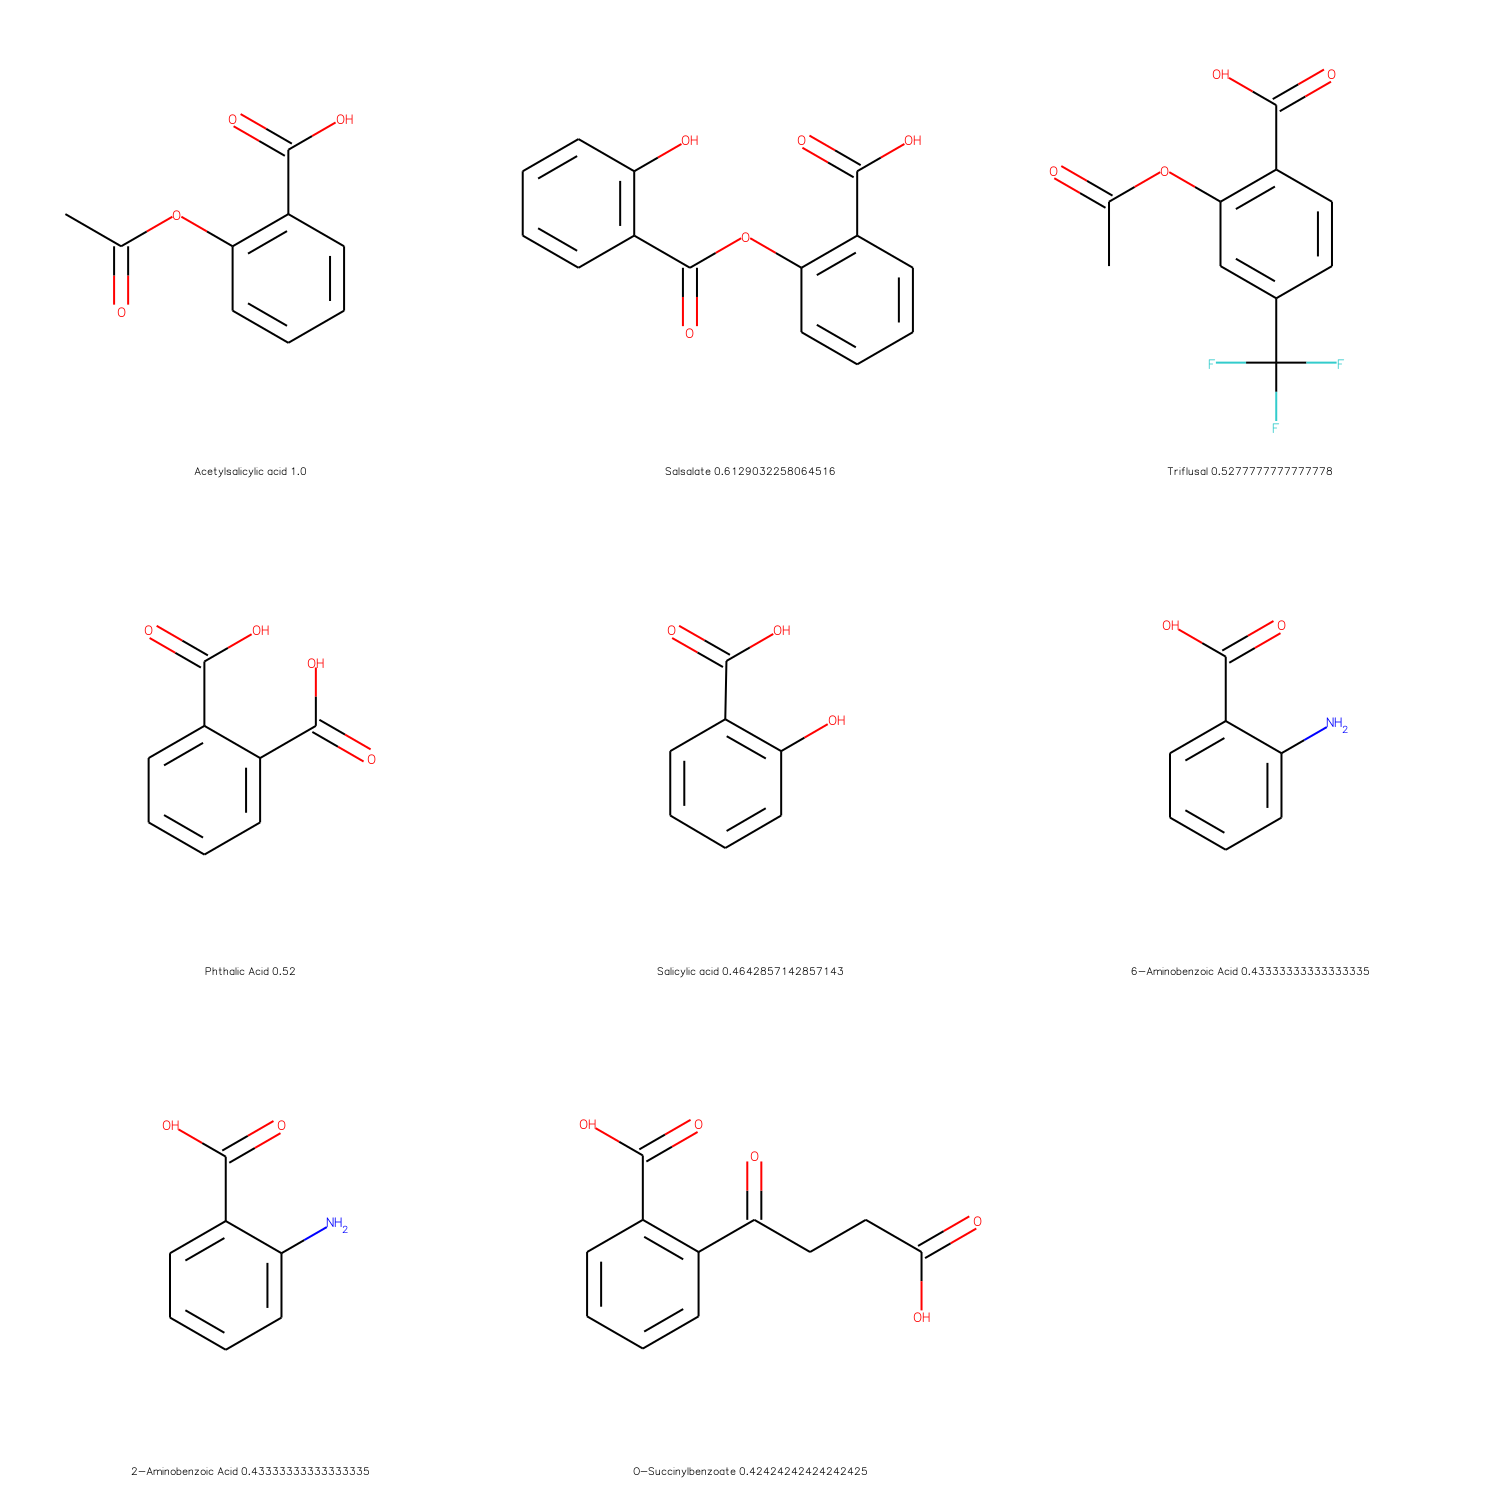

In [9]:
Draw.MolsToGridImage([m[0] for m in hits[:8]], 
                     subImgSize=(500,500), 
                     legends=[m[0].GetProp('GENERIC_NAME') + ' ' + str(m[1]) for m in hits[:8]])

## Verze s MACCS keys

In [16]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)
sims_maccs = [DataStructs.FingerprintSimilarity(aspirin_maccs, macc, metric=DataStructs.TanimotoSimilarity) for macc in drugbank_maccs]
hits_maccs = sorted(zip(drugbank, sims_maccs), key=lambda x: x[1], reverse=True)

In [17]:
hits_maccs[:5]

[(<rdkit.Chem.rdchem.Mol at 0x7f79495466c0>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7f794954e300>, 0.8333333333333334),
 (<rdkit.Chem.rdchem.Mol at 0x7f79494b70d0>, 0.8333333333333334),
 (<rdkit.Chem.rdchem.Mol at 0x7f79494ba7b0>, 0.8076923076923077),
 (<rdkit.Chem.rdchem.Mol at 0x7f79494b62b0>, 0.8)]

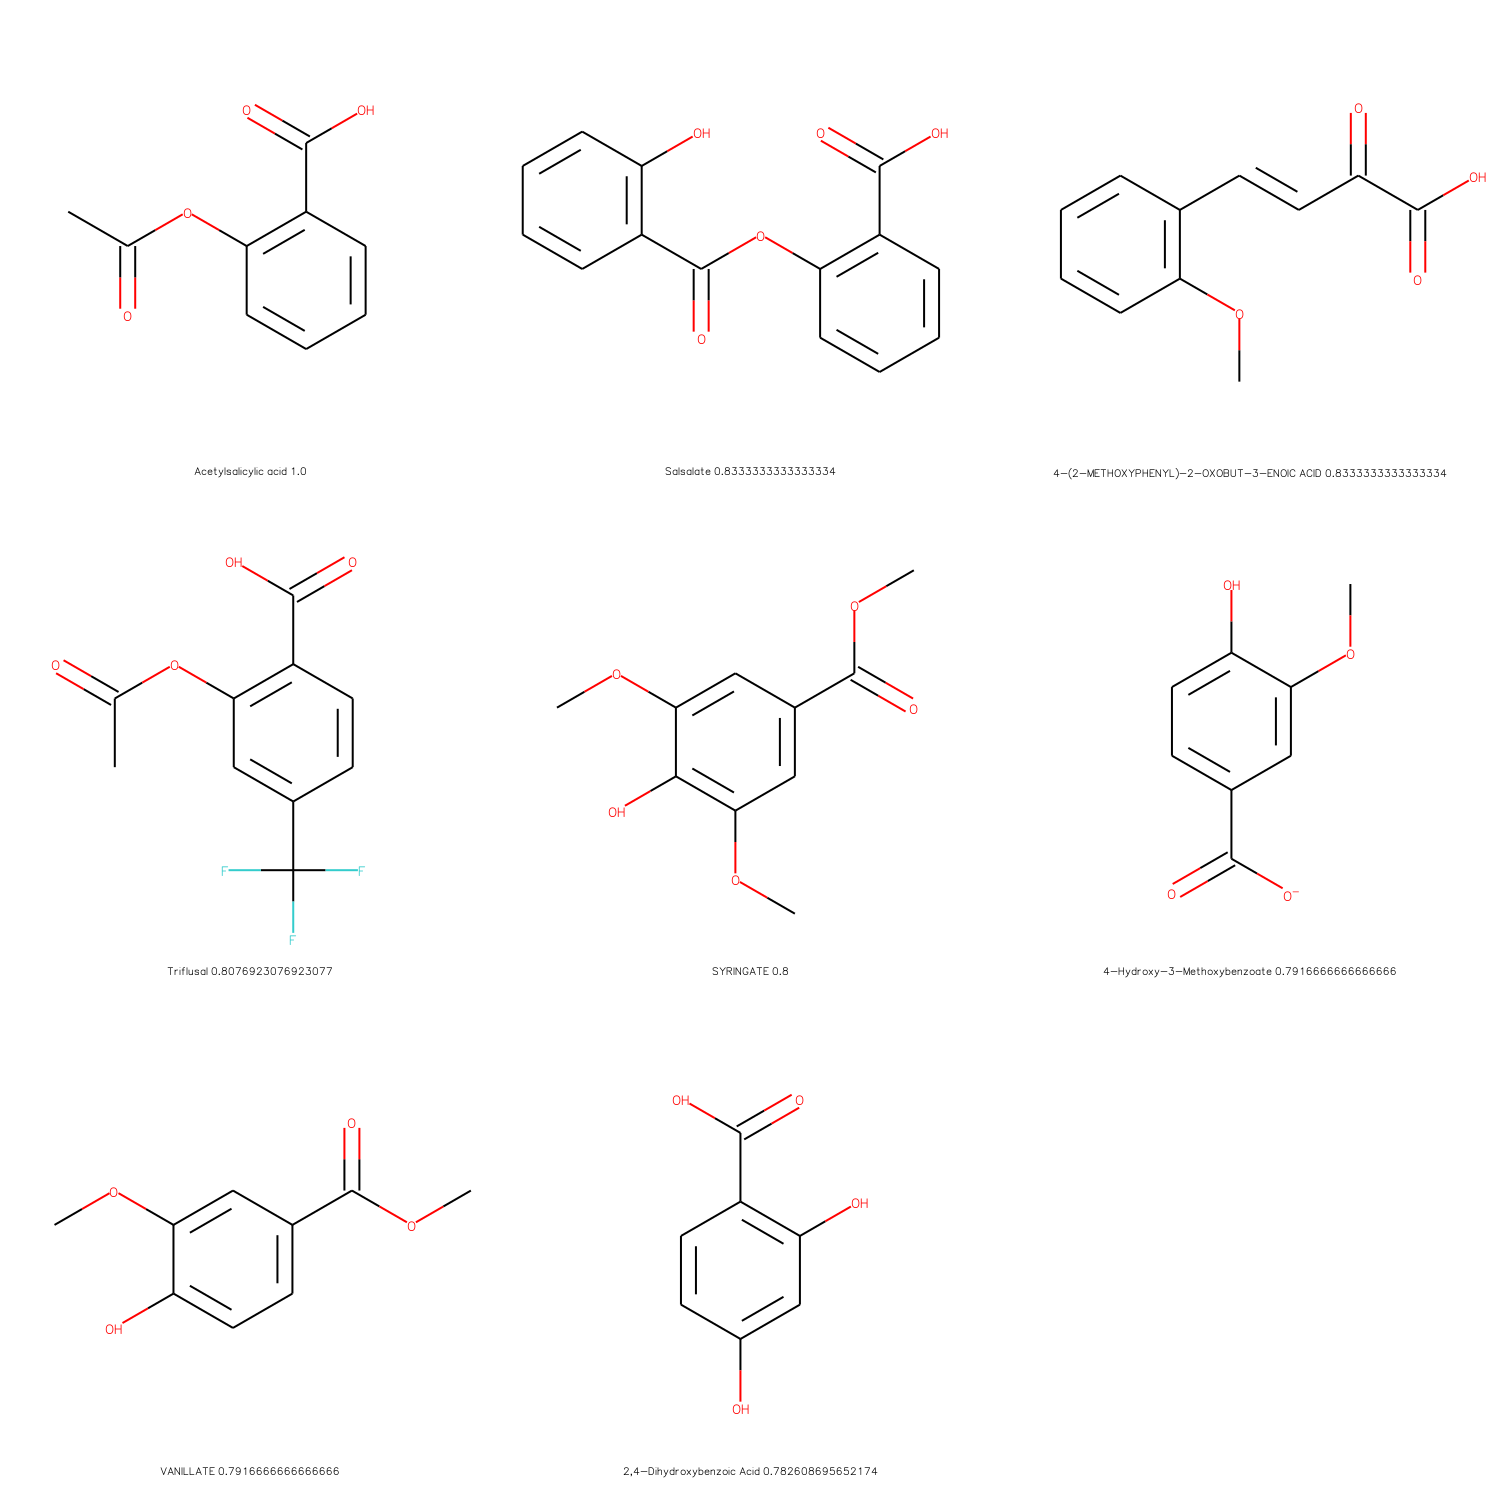

In [19]:
Draw.MolsToGridImage([m[0] for m in hits_maccs[:8]], 
                     subImgSize=(500,500), 
                     legends=[m[0].GetProp('GENERIC_NAME') + ' ' + str(m[1]) for m in hits_maccs[:8]])

# Hledani nepodobnych latek 

In [11]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [12]:
picker = MaxMinPicker()

In [13]:
def distance_function(i1, i2, *args, fingerprints=mfp):
    d = 1 - DataStructs.FingerprintSimilarity(mfp[i1], mfp[i2], metric=DataStructs.TanimotoSimilarity)
    return d

In [14]:
picked = picker.LazyPick(distance_function, len(mfp), 20)

In [15]:
list(picked),len(picked)

([2662,
  215,
  400,
  441,
  645,
  1187,
  1197,
  1198,
  1201,
  1377,
  1378,
  2693,
  2782,
  3859,
  3946,
  4412,
  4633,
  4659,
  6848,
  6872],
 20)

In [16]:
picked_mols = [drugbank[i] for i in picked]

In [ ]:
Draw.MolsToGridImage(picked_mols[:10], subImgSize=(500,500))

In [ ]:
Draw.MolsToGridImage(picked_mols[10:20], subImgSize=(500,500))

# Omezeni na organiku

In [20]:
#odstraneni molekul s ani jednim uhlikem a udelat novy diversity picking
carbon = Chem.MolFromSmarts("[#6]")

organic = [m for m in drugbank if m.HasSubstructMatch(carbon)]
len(organic)

7031

In [21]:
mfp_org = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in organic]

In [23]:
def org_distance_function(i1, i2, *args, fingerprints=mfp_org):
    d = 1 - DataStructs.FingerprintSimilarity(mfp_org[i1], mfp_org[i2], metric=DataStructs.TanimotoSimilarity)
    return d

In [32]:
picker_org = MaxMinPicker()
picked_org = picker.LazyPick(org_distance_function, len(mfp_org), 20, seed=666)
list(picked_org), len(picked_org)

([4924,
  438,
  474,
  2668,
  2706,
  4626,
  6917,
  1697,
  3294,
  2716,
  3270,
  2610,
  6670,
  3373,
  6817,
  642,
  1448,
  2789,
  1772,
  1998],
 20)

In [33]:
picked_mols_org = [organic[i] for i in picked_org]

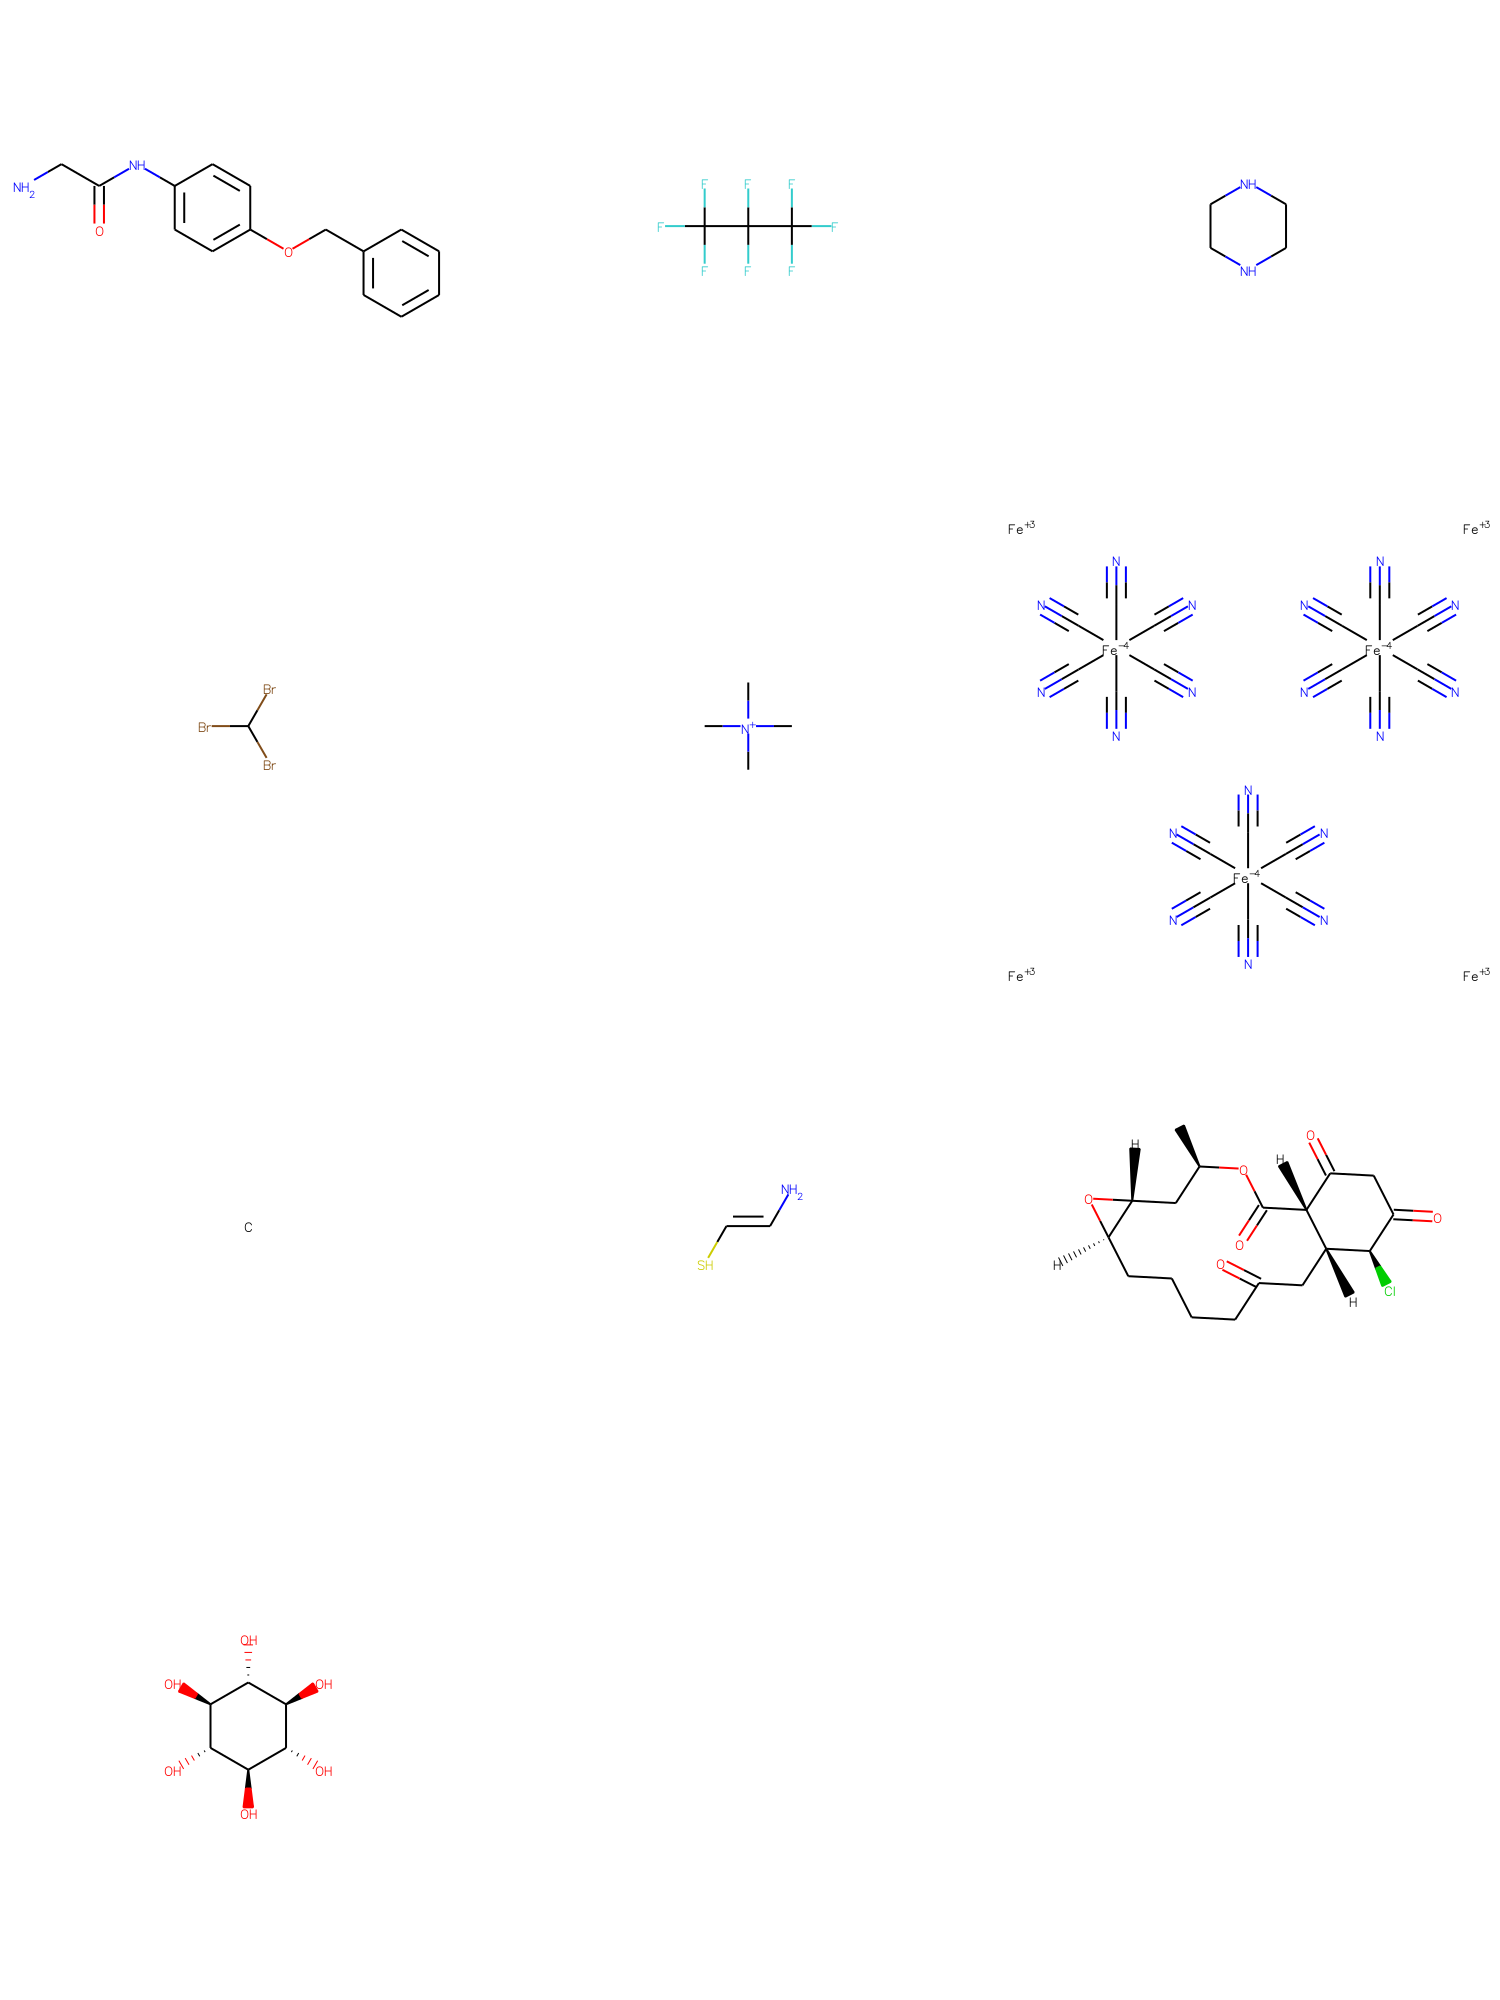

In [35]:
Draw.MolsToGridImage(picked_mols_org[:10], subImgSize=(500,500))